# Load Datasets from EO Forest STAC Catalog 

This notebook shows an example **how to load a dataset from the [EO Forest STAC Catalog](https://simonbesnard1.github.io/eoforeststac/#/?.language=en)**, a thematic atlas of forest Earth observation datasets, bringing together global and regional products on biomass, carbon cycling, disturbance, canopy structure, and forest demography to support integrated ecosystem analysis.
    
### Setup
In order to run this notebook you may install [`xcube_stac`](https://github.com/xcube-dev/xcube-stac), following the [README](../README.md).

First, we first import everything we need:

In [1]:
from xcube.core.store import new_data_store, get_data_store_params_schema

Next, we can view the store parameters needed to initialize a STAC [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). Use the dropdown menu `properties` in the json object below.

In [2]:
get_data_store_params_schema("stac")

As shown in the [GitHub examples](https://github.com/simonbesnard1/eoforeststac?tab=readme-ov-file#load-and-subset-data), the datasets are hosted in a public S3 bucket accessible via the custom endpoint `https://s3.gfz-potsdam.de`. Because this is not the default AWS S3 endpoint, the `endpoint_url` must be provided when creating the data store instance, as shown below:

In [3]:
store = new_data_store(
    "stac",
    url="https://s3.gfz-potsdam.de/dog.atlaseo-glm.eo-gridded-data/collections/public/catalog.json", 
    anon=True,
    client_kwargs=dict(endpoint_url="https://s3.gfz-potsdam.de")
)

/home/konstantin/micromamba/envs/xcube-stac/lib/python3.13/site-packages/pystac_client/client.py:191: NoConformsTo: Server does not advertise any conformance classes.
  warnings.warn(NoConformsTo())


The data IDs point to a [STAC item's JSON](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md) and are specified by the segment of the URL that follows the catalog's URL. The data IDs can be listed as shown below:

In [4]:
%%time
data_ids = store.list_data_ids()
data_ids

CPU times: user 142 ms, sys: 15.4 ms, total: 158 ms
Wall time: 1.59 s


['biomass-carbon/CCI_BIOMASS/CCI_BIOMASS_v6.0/CCI_BIOMASS_v6.0.json',
 'biomass-carbon/SAATCHI_BIOMASS/SAATCHI_BIOMASS_v2.0/SAATCHI_BIOMASS_v2.0.json',
 'biomass-carbon/LIU_BIOMASS/LIU_BIOMASS_v0.1/LIU_BIOMASS_v0.1.json',
 'biomass-carbon/ROBINSON_CR/ROBINSON_CR_v1.0/ROBINSON_CR_v1.0.json',
 'disturbance-change/EFDA/EFDA_v2.1.1/EFDA_v2.1.1.json',
 'disturbance-change/JRC_TMF/JRC_TMF_v2024/JRC_TMF_v2024.json',
 'disturbance-change/HANSEN_GFC/HANSEN_GFC_v1.12/HANSEN_GFC_v1.12.json',
 'disturbance-change/JRC_GFC2020/JRC_GFC2020_v3.0/JRC_GFC2020_v3.0.json',
 'disturbance-change/RADD_EUROPE/RADD_EUROPE_v1.0/RADD_EUROPE_v1.0.json',
 'structure-demography/GAMI/GAMI_v2.0/GAMI_v2.0.json',
 'structure-demography/GAMI/GAMI_v2.1/GAMI_v2.1.json',
 'structure-demography/GAMI/GAMI_v3.0/GAMI_v3.0.json',
 'structure-demography/GAMI/GAMI_v3.1/GAMI_v3.1.json',
 'structure-demography/POTAPOV_HEIGHT/POTAPOV_HEIGHT_v1.0/POTAPOV_HEIGHT_v1.0.json',
 'structure-demography/FORESTPATHS_GENUS/FORESTPATHS_GENUS_v0

---
### Access [Global Age Mapping Integration (GAMI)](https://simonbesnard1.github.io/eoforeststac/#/structure-demography/GAMI/GAMI_v3.1/GAMI_v3.1.json?.asset=asset-zarr) dataset

We can use the listed data IDs to open the dataset lazily.

In [5]:
%%time
ds = store.open_data("structure-demography/GAMI/GAMI_v3.1/GAMI_v3.1.json")
ds

CPU times: user 269 ms, sys: 63.7 ms, total: 332 ms
Wall time: 703 ms


<xarray.Dataset> Size: 13TB
Dimensions:      (members: 20, latitude: 202500, longitude: 405000, time: 2)
Coordinates:
  * latitude     (latitude) float64 2MB 90.0 90.0 90.0 ... -90.0 -90.0 -90.0
  * longitude    (longitude) float64 3MB -180.0 -180.0 -180.0 ... 180.0 180.0
  * members      (members) int64 160B 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * time         (time) datetime64[ns] 16B 2010-01-01 2020-01-01
    spatial_ref  int64 8B 0
Data variables:
    forest_age   (members, latitude, longitude, time) float32 13TB dask.array<chunksize=(5, 500, 500, 2), meta=np.ndarray>
Attributes:
    stac_catalog_url:    https://s3.gfz-potsdam.de/dog.atlaseo-glm.eo-gridded...
    stac_item_id:        GAMI_v3.1
    xcube_stac_version:  1.1.2

We ca perform a simple subsettig on the fly and plot the selected area, which loads the data from the object storage.

In [6]:
%%time
ds_sub = ds.sel(
    members=0, 
    time="2020-01-01", 
    latitude=slice(53, 52), 
    longitude=slice(9.5, 10.5)
)
ds_sub

CPU times: user 30.4 ms, sys: 17.1 ms, total: 47.5 ms
Wall time: 46.3 ms


<xarray.Dataset> Size: 5MB
Dimensions:      (latitude: 1125, longitude: 1126)
Coordinates:
  * latitude     (latitude) float64 9kB 53.0 53.0 53.0 53.0 ... 52.0 52.0 52.0
  * longitude    (longitude) float64 9kB 9.5 9.501 9.502 ... 10.5 10.5 10.5
    members      int64 8B 0
    time         datetime64[ns] 8B 2020-01-01
    spatial_ref  int64 8B 0
Data variables:
    forest_age   (latitude, longitude) float32 5MB dask.array<chunksize=(375, 313), meta=np.ndarray>
Attributes:
    stac_catalog_url:    https://s3.gfz-potsdam.de/dog.atlaseo-glm.eo-gridded...
    stac_item_id:        GAMI_v3.1
    xcube_stac_version:  1.1.2

CPU times: user 1.71 s, sys: 312 ms, total: 2.02 s
Wall time: 2.78 s


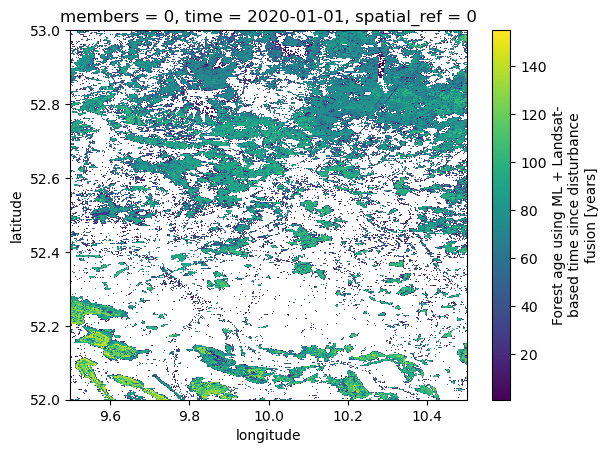

In [7]:
%%time
ds_sub.forest_age.plot()

---
### Access [Saatchi & Yu - 2020 Global aboveground biomass (100 m)](https://simonbesnard1.github.io/eoforeststac/#/biomass-carbon/SAATCHI_BIOMASS/SAATCHI_BIOMASS_v2.0/SAATCHI_BIOMASS_v2.0.json?.asset=asset-zarr)

As a second example, we open the global aboveground biomass dataset by Saatchi & Yu.

In [8]:
%%time
ds = store.open_data("biomass-carbon/SAATCHI_BIOMASS/SAATCHI_BIOMASS_v2.0/SAATCHI_BIOMASS_v2.0.json")
ds

CPU times: user 168 ms, sys: 13.4 ms, total: 182 ms
Wall time: 520 ms


<xarray.Dataset> Size: 536GB
Dimensions:      (latitude: 161272, longitude: 415158)
Coordinates:
  * latitude     (latitude) float64 1MB 85.62 85.62 85.62 ... -59.25 -59.25
  * longitude    (longitude) float64 3MB -176.5 -176.5 -176.5 ... 196.5 196.5
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    agb          (latitude, longitude) float64 536GB dask.array<chunksize=(1000, 1000), meta=np.ndarray>
Attributes:
    stac_catalog_url:    https://s3.gfz-potsdam.de/dog.atlaseo-glm.eo-gridded...
    stac_item_id:        SAATCHI_BIOMASS_v2.0
    xcube_stac_version:  1.1.2

In [9]:
%%time
ds_sub = ds.sel(
    latitude=slice(53, 52), 
    longitude=slice(9.5, 10.5)
)
ds_sub

CPU times: user 29.5 ms, sys: 3.15 ms, total: 32.7 ms
Wall time: 31.4 ms


<xarray.Dataset> Size: 10MB
Dimensions:      (latitude: 1113, longitude: 1114)
Coordinates:
  * latitude     (latitude) float64 9kB 53.0 53.0 53.0 53.0 ... 52.0 52.0 52.0
  * longitude    (longitude) float64 9kB 9.5 9.501 9.502 ... 10.5 10.5 10.5
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    agb          (latitude, longitude) float64 10MB dask.array<chunksize=(688, 966), meta=np.ndarray>
Attributes:
    stac_catalog_url:    https://s3.gfz-potsdam.de/dog.atlaseo-glm.eo-gridded...
    stac_item_id:        SAATCHI_BIOMASS_v2.0
    xcube_stac_version:  1.1.2

CPU times: user 476 ms, sys: 60.1 ms, total: 536 ms
Wall time: 851 ms


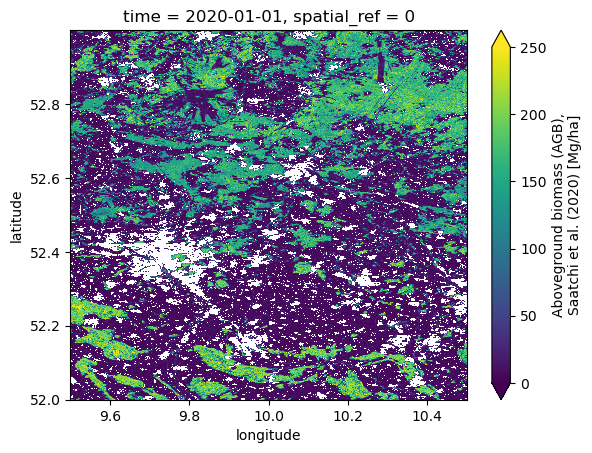

In [10]:
%%time
ds_sub.agb.plot(vmin=0, vmax=250)